# 📈 Análise Exploratória de Dados: Perfil dos Investidores do Tesouro Direto


# 1. Introdução

### O Tesouro Direto é um programa do Governo Federal que permite a pessoas físicas investirem em títulos públicos de forma acessível, segura e com diferentes opções de rentabilidade e prazos. 
### Nesse contexto, compreender o perfil e o comportamento dos investidores torna-se fundamental para identificar padrões, desigualdades e níveis de engajamento no uso desse instrumento financeiro. A partir do conjunto de dados analisado neste projeto, busca-se descrever o perfil dos investidores, investigar diferenças por gênero,faixa etária, região e estado civil, bem como avaliar o nível de atividade recente dos investidores. 


# 2. Base de dados

### O projeto utiliza a base de dados insvestidorestesourodireto2025.csv, que contém informações sobre investidores do Tesouro Direto no ano de 2025. A base possui mais de 6 milhões de registros e conta com 11 colunas, incluindo dados pessoais (idade, gênero, estado civil, profissão), localização (UF, cidade e país), situação da conta e data de adesão.

## 2.1 Conhecendo a Base de Dados 

In [6]:
# Importanto as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Acessando o arquivo 

df = pd.read_csv(
    r'C:\Users\palom\Downloads\projeto_estatistica\Investidores_Tesouro_Direto_2025.csv',
    sep=';',
    encoding='latin1'
)



In [9]:
# Conhecendo a base de dados 

df.head()

,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Pais do Investidor,Situacao da Conta,Operou 12 Meses
0,3863,15/12/2025,Desquitado(a),M,CONTADOR,43,SP,SAO PAULO,BRASIL,A,N
1,3919,05/05/2025,Solteiro(a),M,"SUPERIOR, INSPETOR E AGENTE DE COMPRAS E VENDAS",65,SP,SAO PAULO,BRASIL,A,S
2,3955,19/08/2025,Solteiro(a),M,OUTROS,55,RJ,RIO DE JANEIRO,BRASIL,D,N
3,3979,07/01/2025,Solteiro(a),M,ENGENHEIRO,55,RJ,RIO DE JANEIRO,BRASIL,A,S
4,4030,27/01/2025,Casado(a) com brasileiro(a) naturalizado(a),M,CONTADOR,39,MS,SAO GABRIEL DO OESTE,BRASIL,A,N


In [12]:
# Conhecendo a base de dados 
df.shape


(6329490, 11)

In [16]:
# Conhecendo a base de dados 
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6329490 entries, 0 to 6329489
Data columns (total 11 columns):
 #   Column                Dtype
---  ------                -----
 0   Codigo do Investidor  int64
 1   Data de Adesao        str  
 2   Estado Civil          str  
 3   Genero                str  
 4   Profissao             str  
 5   Idade                 int64
 6   UF do Investidor      str  
 7   Cidade do Investidor  str  
 8   Pais do Investidor    str  
 9   Situacao da Conta     str  
 10  Operou 12 Meses       str  
dtypes: int64(2), str(9)
memory usage: 531.2 MB


## 2.2 Trabalhando com Amostragem 

### Após uma análise geral da base de dados, verificou-se que ela é muito extensa. Portanto, decidiu-se trabalhar com uma amostragem de 10% dos registros, a fim de reduzir o consumo de memória e tornar a visualização de gráficos e tabelas mais clara e interpretável no Jupyter Notebook.

In [10]:
# Selecionando uma amostra de 600 mil investidores (10%) para análise
df_sample = df.sample(n=600_000, random_state=42)

# Conferindo o tamanho da amostra
print(df_sample.shape)

(600000, 11)


## 2.3 Tratamento dos dados

### Foram realizados alguns tratamentos na base de dados, incluindo:

### Conversão da coluna Data de Adesao do tipo string para datetime, permitindo operações e análises temporais;

### Padronização de textos em algumas colunas;

### Verificação se há linhas nulas;

### Inclusão de novas colunas, como faixa_etaria, para agrupar os investidores por faixa etária, e regiao, para classificar os estados em regiões geográficas do Brasil

In [20]:
# Converter a coluna 'Data de Adesao' para formato de data
df_sample['Data de Adesao'] = pd.to_datetime(
    df_sample['Data de Adesao'],
    errors='coerce',
    dayfirst=True
)

# Conferir as primeiras linhas
df_sample['Data de Adesao'].head()

4307470   2025-10-08
3980028   2025-01-30
4185576   2025-07-14
5621218   2025-12-17
1572382   2025-09-04
Name: Data de Adesao, dtype: datetime64[us]

In [21]:
print("Quantidade de linhas com data nula:", df_sample['Data de Adesao'].isna().sum())

Quantidade de linhas com data nula: 0


In [22]:
# Conferindo se existe valor nulos nas outras colunas 
print(df_sample[['Idade', 'Genero', 'UF do Investidor', 'Profissao']].isna().sum())


Idade               0
Genero              0
UF do Investidor    0
Profissao           0
dtype: int64


In [23]:
# Padronizando os dados da coluna "gênero"
# Substituir "N" por "Não informado" na coluna 'Genero'
df_sample['Genero'] = df_sample['Genero'].replace('N', 'Não informado')
df_sample['Genero'] = df_sample['Genero'].replace('M', 'Masculino')
df_sample['Genero'] = df_sample['Genero'].replace ('F', 'Feminino')

# Padronizando os dados da coluna "Operou 12 Meses"
df_sample['Operou 12 Meses'] = df_sample['Operou 12 Meses'].replace('N', 'Não Operou')
df_sample['Operou 12 Meses'] = df_sample['Operou 12 Meses'].replace('S', 'Operou')

df_sample['Estado Civil'] = df_sample['Estado Civil'].replace ('ViÃºvo(a)', 'Viúvo(a)')


df_sample['Genero'].value_counts()

Genero
Masculino        427012
Feminino         170244
Não informado      2744
Name: count, dtype: int64

In [12]:
# Criando uma categoria Região 

# Dicionário de UF para Região
uf_regiao = {
    'AC':'Norte','AL':'Nordeste','AP':'Norte','AM':'Norte','BA':'Nordeste','CE':'Nordeste',
    'DF':'Centro-Oeste','ES':'Sudeste','GO':'Centro-Oeste','MA':'Nordeste','MT':'Centro-Oeste',
    'MS':'Centro-Oeste','MG':'Sudeste','PA':'Norte','PB':'Nordeste','PR':'Sul','PE':'Nordeste',
    'PI':'Nordeste','RJ':'Sudeste','RN':'Nordeste','RS':'Sul','RO':'Norte','RR':'Norte',
    'SC':'Sul','SP':'Sudeste','SE':'Nordeste','TO':'Norte'
}

# Criar coluna 'Regiao'
df_sample['Regiao'] = df_sample['UF do Investidor'].map(uf_regiao)

# Conferir algumas linhas
df_sample[['UF do Investidor','Regiao']].head(10)


,UF do Investidor,Regiao
4307470,SP,Sudeste
3980028,RJ,Sudeste
4185576,TO,Norte
5621218,PR,Sul
1572382,RJ,Sudeste
1354547,AM,Norte
1997033,AL,Nordeste
5414832,RJ,Sudeste
277317,RS,Sul
1358307,SP,Sudeste


In [13]:
# Criando a categoria faixa etária 

# Definir intervalos de idade
bins = [0, 17, 24, 34, 44, 54, 64, 100]  # limites das faixas
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']  # nomes das faixas

# Criar coluna 'Faixa_Etaria'
df_sample['Faixa_Etaria'] = pd.cut(df_sample['Idade'], bins=bins, labels=labels)

# Conferir algumas linhas
df_sample.head(10)


,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Pais do Investidor,Situacao da Conta,Operou 12 Meses,Faixa_Etaria,Regiao
4307470,47399363,08/10/2025,Solteiro(a),M,OUTROS,25,SP,SAO PAULO,BRASIL,A,N,25-34,Sudeste
3980028,14274534,30/01/2025,Solteiro(a),M,OUTROS,26,RJ,BELFORD ROXO,BRASIL,A,N,25-34,Sudeste
4185576,61906438,14/07/2025,Solteiro(a),F,OUTROS,33,TO,ANANAS,BRASIL,A,N,25-34,Norte
5621218,30971445,17/12/2025,Solteiro(a),M,OUTROS TRABALHADORES DE NÃVEL SUPERIOR LIGADO...,48,PR,CANTAGALO,BRASIL,A,N,45-54,Sul
1572382,13066973,04/09/2025,Desquitado(a),M,OUTROS,41,RJ,BELFORD ROXO,BRASIL,A,N,35-44,Sudeste
1354547,64121121,01/12/2025,Desquitado(a),M,"VENDEDOR PRACISTA, REPRESENTANTE COMERCIAL, CA...",18,AM,MANAUS,BRASIL,A,N,18-24,Norte
1997033,3944057,08/07/2025,Divorciado(a),F,ASSISTENTE SOCIAL,51,AL,MACEIO,BRASIL,A,N,45-54,Nordeste
5414832,42906771,18/11/2025,Desquitado(a),F,MILITAR REFORMADO,51,RJ,RIO DE JANEIRO,BRASIL,A,N,45-54,Sudeste
277317,61353685,09/06/2025,Casado(a) com brasileiro(a) nato(a),F,PENSIONISTA,72,RS,PORTO ALEGRE,BRASIL,A,N,65+,Sul
1358307,4008002,08/09/2025,Desquitado(a),M,ADMINISTRADOR,26,SP,SAO PAULO,BRASIL,A,N,25-34,Sudeste


In [39]:
df_sample['Regiao'] = df_sample['Regiao'].astype('category')

In [40]:
df_sample.info()

<class 'pandas.DataFrame'>
Index: 300000 entries, 4307470 to 1741091
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Codigo do Investidor  300000 non-null  int64         
 1   Data de Adesao        300000 non-null  datetime64[us]
 2   Estado Civil          300000 non-null  str           
 3   Genero                300000 non-null  str           
 4   Profissao             300000 non-null  str           
 5   Idade                 300000 non-null  int64         
 6   UF do Investidor      300000 non-null  str           
 7   Cidade do Investidor  300000 non-null  str           
 8   Pais do Investidor    300000 non-null  str           
 9   Situacao da Conta     300000 non-null  str           
 10  Operou 12 Meses       300000 non-null  str           
 11  Faixa_Etaria          299840 non-null  category      
 12  Regiao                300000 non-null  category      
dtypes: categ

In [162]:
regiao_counts = df_sample['Regiao'].value_counts().sort_index()
print(regiao_counts)

Regiao
Centro-Oeste     54183
Nordeste        110764
Norte            40420
Sudeste         308711
Sul              85922
Name: count, dtype: int64


# 3.1 Análise Geral dos Dados


### Inicialmente, foi realizada uma análise geral da base de dados. Observou-se que a maior parte dos registros pertence ao gênero masculino, o que poderia gerar um viés nos resultados caso todas as análises fossem realizadas conjuntamente.

### Para garantir a precisão das análises e permitir a identificação de padrões específicos de cada grupo, decidiu-se conduzir a análise separadamente para os diferentes gêneros.

C:\Users\palom\AppData\Local\Temp\ipykernel_77152\24543789.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faixa_etaria_porcentagem.index, y=faixa_etaria_porcentagem.values, palette="Set1")


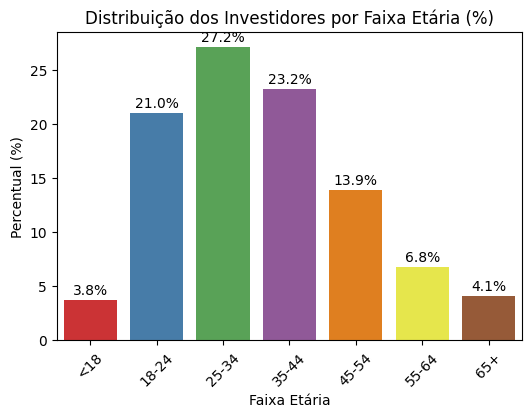

In [164]:
#Quantidade de investidores por faixa etária 

faixa_etaria_counts = df_sample['Faixa_Etaria'].value_counts().sort_index()

faixa_etaria_porcentagem = (df_sample['Faixa_Etaria'].value_counts(normalize=True).sort_index()* 100)
                            
#print(faixa_etaria_counts)
#print(faixa_etaria_porcentagem)

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=faixa_etaria_porcentagem.index, y=faixa_etaria_porcentagem.values, palette="Set1")
plt.title("Distribuição dos Investidores por Faixa Etária (%)")
plt.ylabel("Percentual (%)")
plt.xlabel("Faixa Etária")

plt.xticks(rotation=45)  # 45 graus deixa legível

# Adicionar valores no topo das barras
for i, v in enumerate(faixa_etaria_porcentagem.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.show()


# Resultado

### Esses resultados mostram que os investidores jovens e de meia-idade são o grupo predominante, indicando que o Tesouro Direto atrai principalmente pessoas em idade economicamente ativa, possivelmente com maior capacidade de poupança e interesse em planejamento financeiro de médio e longo prazo.

In [81]:
genero_counts = df_sample['Genero'].value_counts().sort_index()
print(genero_counts)

Genero
Feminino         170244
Masculino        427012
Não informado      2744
Name: count, dtype: int64


C:\Users\palom\AppData\Local\Temp\ipykernel_77152\4113495837.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genero_perc.index, y=genero_perc.values, palette="Set1")


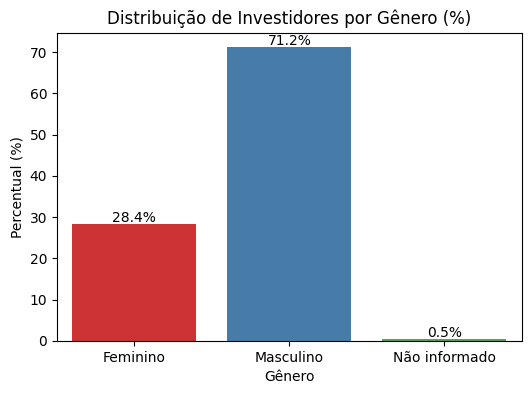

In [156]:
# Transformar em porcentagem a quantidade em cada gênero
genero_perc = (genero_counts / genero_counts.sum()) * 100

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=genero_perc.index, y=genero_perc.values, palette="Set1")
plt.title("Distribuição de Investidores por Gênero (%)")
plt.ylabel("Percentual (%)")
plt.xlabel("Gênero")

# Adicionar valores no topo das barras
for i, v in enumerate(genero_perc.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.show()

# Resultado

### Esse resultado evidencia que o investidor do Tesouro Direto em 2025 é majoritariamente do gênero masculino. 
### Essa disparidade também aponta para um potencial de crescimento no público feminino, sugerindo oportunidades para educação financeira direcionada e incentivo à participação de mulheres nos investimentos em Tesouro Direto.


In [166]:
# Operação 

df_sample['Operou 12 Meses'].value_counts()

# Transformando em porcentagem 
operou_pct = (
    df_sample['Operou 12 Meses']
    .value_counts(normalize=True) * 100
).round(2)

operou_pct

Operou 12 Meses
Não Operou    89.26
Operou        10.74
Name: proportion, dtype: float64

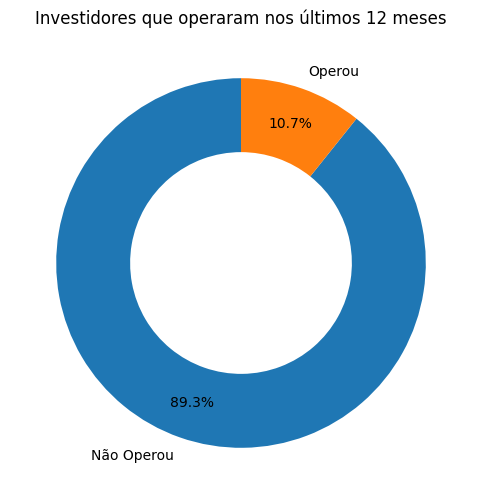

In [167]:
# Gerando o gráfico Donut
# Dados
labels = operou_pct.index
values = operou_pct.values

plt.figure(figsize=(6,6))

plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
     pctdistance=0.80,   # controla onde a porcentagem aparece
    wedgeprops={'width': 0.4}  # cria o efeito donut
)

plt.title('Investidores que operaram nos últimos 12 meses')
plt.show()

# Resultado 

## Observa-se que apenas uma pequena parcela dos investidores realizou operações no Tesouro Direto nos últimos 12 meses. Esse resultado indica que, embora haja um número elevado de investidores cadastrados, a maior parte da base apresenta baixo nível de atividade recente.

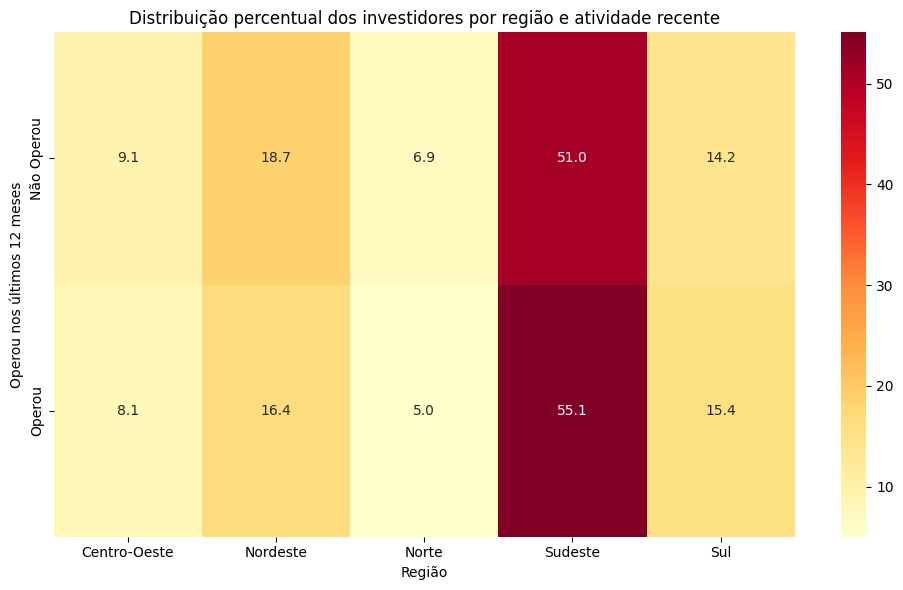

In [168]:
# Tabela cruzada: Regiao x Operou (percentual)
heatmap_operou = pd.crosstab(
    df_sample['Operou 12 Meses'],
    df_sample['Regiao'],
    normalize='index'
) * 100

# Arredondar
heatmap_operou = heatmap_operou.round(2)

heatmap_operou

# Gerando o mapa de Calor 

plt.figure(figsize=(10,6))

sns.heatmap(
    heatmap_operou,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd"
)

plt.title("Distribuição percentual dos investidores por região e atividade recente")
plt.xlabel("Região")
plt.ylabel("Operou nos últimos 12 meses")

plt.tight_layout()
plt.show()

# Resultado 

## O mapa de calor evidencia que a distribuição regional dos investidores permanece relativamente semelhante entre aqueles que operaram e os que não operaram nos últimos 12 meses. Observa-se forte concentração no Sudeste em ambos os grupos, enquanto Norte e Centro-Oeste apresentam menor participação. Esse resultado sugere que a região, isoladamente, não é um fator determinante para a atividade recente no Tesouro Direto

## 3.2 Análise por Gênero - Femenino 

### 3.2.1 Análise por Faixa Etária e Região

In [18]:
df_sample['Estado Civil'] = df_sample['Estado Civil'].replace({
    'Casado(a) com brasileiro(a) nato(a)': 'Casado(a)',
    'Casado(a) com brasileiro(a) naturalizado(a)': 'Casado(a)'
})
df_sample['Estado Civil'].head(10)

4307470      Solteiro(a)
3980028      Solteiro(a)
4185576      Solteiro(a)
5621218      Solteiro(a)
1572382    Desquitado(a)
1354547    Desquitado(a)
1997033    Divorciado(a)
5414832    Desquitado(a)
277317         Casado(a)
1358307    Desquitado(a)
Name: Estado Civil, dtype: str

In [24]:
# Filtrar apenas investidoras
df_feminino = df_sample[df_sample['Genero'] == 'Feminino']

# Conferir tamanho
df_feminino.shape

(170244, 13)

In [25]:
# Quantidade de investidoras por faixa etária
faixa_etaria_fem_counts = (
    df_feminino['Faixa_Etaria']
    .value_counts()
    .sort_index()
)

# Porcentagem de investidoras por faixa etária
faixa_etaria_fem_pct = (
    faixa_etaria_fem_counts / faixa_etaria_fem_counts.sum()
) * 100

# Arredondar para 2 casas decimais
faixa_etaria_fem_pct = faixa_etaria_fem_pct.round(2)

print(faixa_etaria_fem_counts)
faixa_etaria_fem_pct


Faixa_Etaria
<18       6981
18-24    29178
25-34    44516
35-44    39386
45-54    25331
55-64    14336
65+      10371
Name: count, dtype: int64


Faixa_Etaria
<18       4.10
18-24    17.15
25-34    26.17
35-44    23.15
45-54    14.89
55-64     8.43
65+       6.10
Name: count, dtype: float64

In [33]:
# Tabela cruzada: Faixa etária x Região (percentual)
heatmap_fem = pd.crosstab(
    df_feminino['Faixa_Etaria'],
    df_feminino['Regiao'],
    normalize='index'
) * 100

# Arredondar
heatmap_fem = heatmap_fem.round(2)

heatmap_fem

Regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
Faixa_Etaria,,,,,
<18,7.62,18.46,5.07,54.96,13.88
18-24,9.88,20.04,6.85,50.07,13.16
25-34,9.95,19.34,7.31,50.17,13.24
35-44,9.64,17.17,7.25,52.15,13.79
45-54,8.82,16.48,7.40,54.80,12.50
55-64,7.67,15.49,8.62,55.40,12.81
65+,6.99,13.77,6.33,60.13,12.79


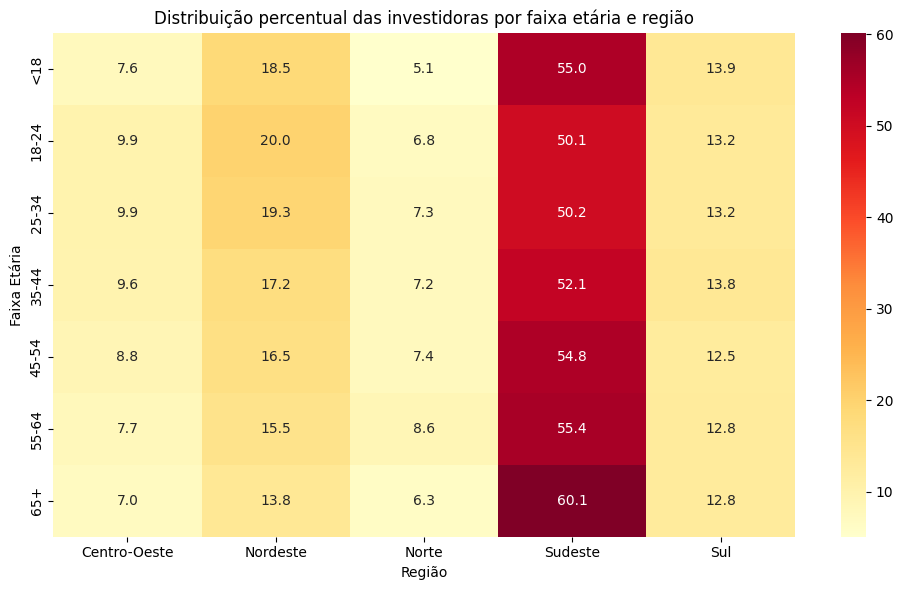

In [27]:
# Gerando o mapa de Calor 

plt.figure(figsize=(10,6))

sns.heatmap(
    heatmap_fem,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd"
)

plt.title("Distribuição percentual das investidoras por faixa etária e região")
plt.xlabel("Região")
plt.ylabel("Faixa Etária")

plt.tight_layout()
plt.show()

# Resultado 

### A análise do cruzamento entre faixa etária e região evidencia forte concentração de investidoras na região Sudeste em todas as faixas etárias, com intensificação nas idades mais elevadas. Observa-se, ainda, redução gradual da participação do Nordeste conforme a idade aumenta, enquanto a região Sul apresenta distribuição relativamente estável ao longo do ciclo de vida. As regiões Norte e Centro-Oeste possuem menor representatividade.

### 3.2.1 Análise por Faixa Etária e Estado Civil

In [39]:
# Tabela cruzada: Faixa Etária x Estado Civil (percentual por faixa)
tabela_faixa_estado = pd.crosstab(
    df_sample['Faixa_Etaria'],
    df_sample['Estado Civil'],
    normalize='index'
) * 100

tabela_faixa_estado.head()

Estado Civil,Casado(a),Desquitado(a),Divorciado(a),NÃ£o se aplica,Solteiro(a),Viúvo(a)
Faixa_Etaria,,,,,,
<18,0.017648,0.136775,0.119126,5.426870,94.251048,0.048533
18-24,0.489792,2.811945,0.206854,1.211007,95.177371,0.103031
25-34,1.873085,16.978131,2.581786,0.025179,78.256864,0.284955
35-44,3.380599,36.197023,7.723496,0.012917,51.863599,0.822366
45-54,4.430547,43.293561,12.731070,0.018005,38.140395,1.386421


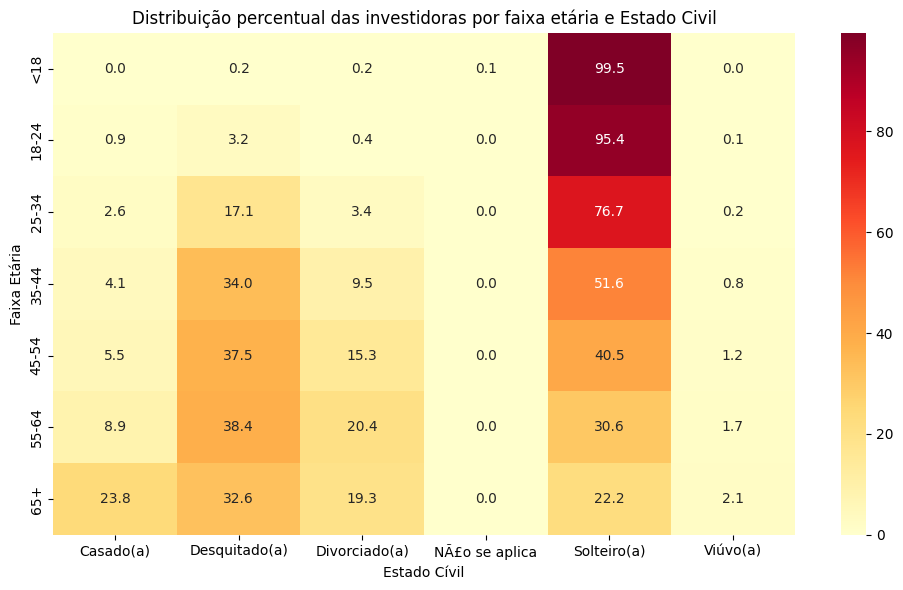

In [38]:
# Tabela cruzada: Faixa etária x Gênero (percentual)

heatmap_fem_genero = pd.crosstab(
    df_feminino['Faixa_Etaria'],
    df_feminino['Estado Civil'],
    normalize='index'
) * 100

# Arredondar
heatmap_fem_genero = heatmap_fem_genero.round(2)

heatmap_fem_genero

# Gerando o mapa de Calor 

plt.figure(figsize=(10,6))

sns.heatmap(
    heatmap_fem_genero,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd"
)

plt.title("Distribuição percentual das investidoras por faixa etária e Estado Civil")
plt.xlabel("Estado Cívil")
plt.ylabel("Faixa Etária")

plt.tight_layout()
plt.show()


# Resultado 

### Considerando exclusivamente o gênero feminino, observa-se que a maioria das investidoras do Tesouro Direto é solteira, sobretudo nas faixas etárias mais jovens. Embora essa proporção diminua com o avanço da idade, o grupo de solteiras permanece como um dos mais representativos ao longo das faixas etárias analisadas, o que pode refletir maior autonomia financeira. 

## 3.3 Análise por Gênero - Masculino

### 3.3.1 Análise por Faixa Etária e Região

In [30]:
# Filtrar apenas investidores
df_masculino = df_sample[df_sample['Genero'] == 'Masculino']

# Conferir tamanho
df_masculino.shape

(427012, 13)

In [31]:
# Quantidade de investidores por faixa etária
faixa_etaria_mas_counts = (
    df_masculino['Faixa_Etaria']
    .value_counts()
    .sort_index()
)

# Porcentagem de investidores por faixa etária
faixa_etaria_mas_pct = (
    faixa_etaria_mas_counts / faixa_etaria_mas_counts.sum()
) * 100

# Arredondar para 2 casas decimais
faixa_etaria_mas_pct = faixa_etaria_mas_pct.round(2)

print(faixa_etaria_mas_counts)
faixa_etaria_mas_pct

Faixa_Etaria
<18       14465
18-24     95490
25-34    118304
35-44     99968
45-54     57976
55-64     26410
65+       14232
Name: count, dtype: int64


Faixa_Etaria
<18       3.39
18-24    22.37
25-34    27.72
35-44    23.42
45-54    13.58
55-64     6.19
65+       3.33
Name: count, dtype: float64

In [35]:
# Tabela cruzada: Faixa etária x Região (percentual)
heatmap_mas = pd.crosstab(
    df_masculino['Faixa_Etaria'],
    df_masculino['Regiao'],
    normalize='index'
) * 100

# Arredondar
heatmap_mas = heatmap_mas.round(2)

heatmap_mas

Regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
Faixa_Etaria,,,,,
<18,8.44,19.76,6.01,52.41,13.38
18-24,9.52,21.24,7.34,46.95,14.96
25-34,9.51,19.21,7.16,48.95,15.17
35-44,8.89,18.36,6.18,51.67,14.90
45-54,8.46,16.48,5.72,55.47,13.86
55-64,7.24,15.31,5.36,57.18,14.91
65+,6.82,13.15,4.26,61.92,13.85


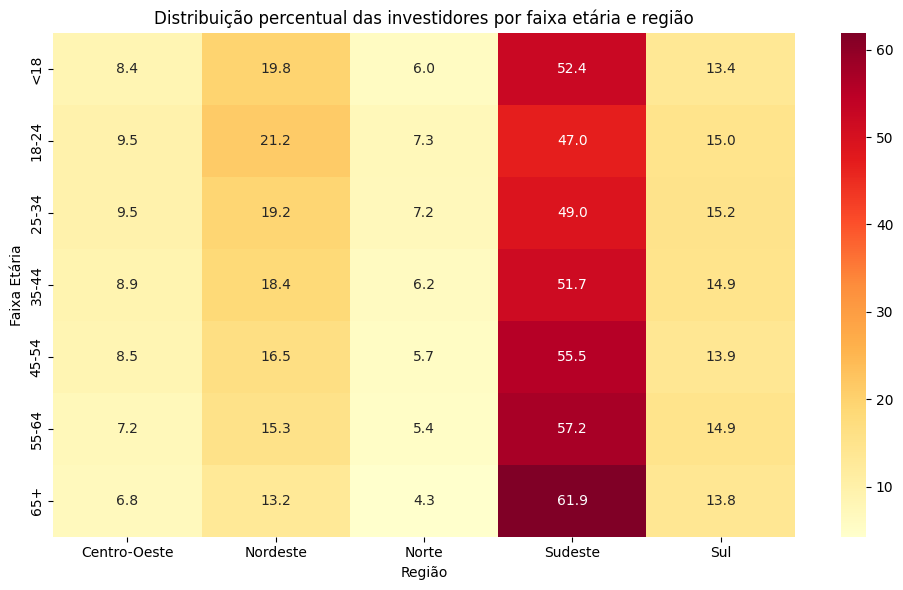

In [34]:
# Gerando o mapa de Calor 

plt.figure(figsize=(10,6))

sns.heatmap(
    heatmap_mas,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd"
)

plt.title("Distribuição percentual das investidores por faixa etária e região")
plt.xlabel("Região")
plt.ylabel("Faixa Etária")

plt.tight_layout()
plt.show()

# Resultado 

### A análise da distribuição regional dos investidores do gênero masculino por faixa etária evidencia a forte predominância da região Sudeste em todas as idades,especialmente entre os investidores mais velhos, onde a participação ultrapassa 60%. As regiões Nordeste e Sul apresentam maior representatividade nas faixas etárias mais jovens, enquanto Norte e Centro-Oeste mantêm participação proporcionalmente menor e estável ao longo das diferentes idades.


## Gênero Feminino e Gênero Masculino
### De forma semelhante ao observado entre as investidoras, o gênero masculino também apresenta forte concentração na região Sudeste em todas as faixas etárias, indicando que a distribuição regional dos investidores do Tesouro Direto é fortemente influenciada por fatores territoriais, independentemente do gênero.

## 3.3.2 Análise por Faixa Etária e Estado Civil

In [36]:
# Tabela cruzada: Faixa etária x Estado Civil (percentual)
heatmap_mas = pd.crosstab(
    df_masculino['Faixa_Etaria'],
    df_masculino['Estado Civil'],
    normalize='index'
) * 100

# Arredondar
heatmap_mas = heatmap_mas.round(2)

heatmap_mas

Estado Civil,Casado(a),Desquitado(a),Divorciado(a),NÃ£o se aplica,Solteiro(a),Viúvo(a)
Faixa_Etaria,,,,,,
<18,0.02,0.13,0.10,0.03,99.65,0.07
18-24,0.37,2.73,0.16,0.01,96.60,0.12
25-34,1.60,16.93,2.27,0.02,78.86,0.32
35-44,3.10,37.06,7.03,0.01,51.96,0.83
45-54,3.95,45.81,11.63,0.02,37.12,1.47
55-64,5.62,50.29,14.97,0.03,26.97,2.12
65+,10.89,56.84,13.50,0.01,16.60,2.17


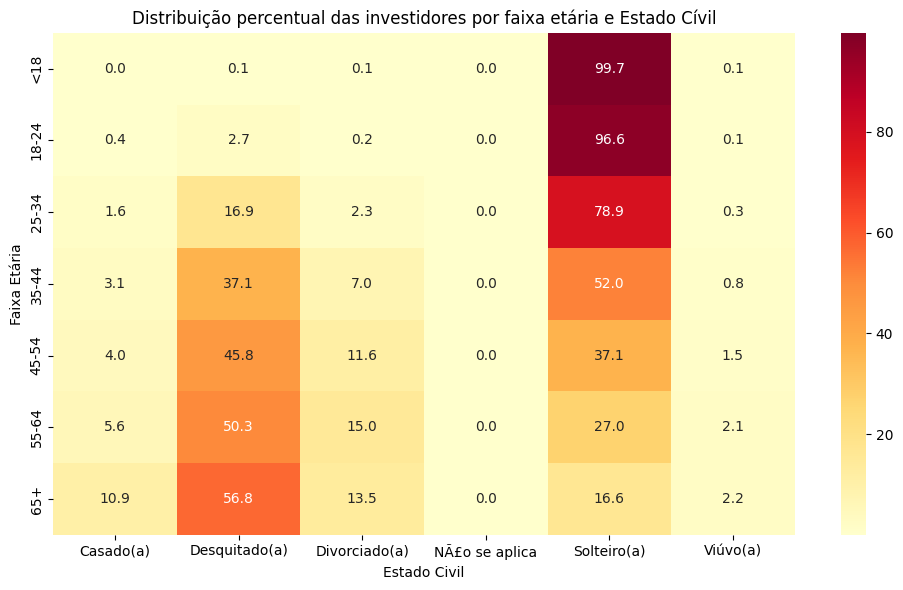

In [40]:
# Gerando o mapa de Calor 

plt.figure(figsize=(10,6))

sns.heatmap(
    heatmap_mas,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd"
)

plt.title("Distribuição percentual das investidores por faixa etária e Estado Cívil")
plt.xlabel("Estado Civil")
plt.ylabel("Faixa Etária")

plt.tight_layout()
plt.show()

# Resultado 

### Entre os investidores do gênero masculino, os dados mostram que a condição de solteiro é predominante nas idades mais jovens, especialmente até os 34 anos. Com o avanço da idade, ocorre uma transição no perfil, caracterizada pela redução dos solteiros e pelo aumento significativo dos investidores desquitados, divorciados e casados.

# Resultado 
## Gênero Feminino e Genêro Masculino 
### Apesar da maioria dos investidores ser solteiro(a), os homens apresentam uma transição mais rápida para outros estados civis ao longo da vida, enquanto as mulheres permanecem solteiras por mais tempo. 

### Embora não seja possível mensurar o valor investido, os dados sugerem que aspectos sociais e demográficos, como o estado civil, compõem o contexto no qual as decisões de investimento no Tesouro Direto são tomadas.

Análise Investidores por países 

In [129]:
# Contagem de investidores por país
pais_counts = df_sample['Pais do Investidor'].value_counts()

# Percentual
pais_pct = (pais_counts / pais_counts.sum() * 100).round(2)

pais_counts

pais_pct

Pais do Investidor
BRASIL    100.0
Name: count, dtype: float64

# Conclusão

### A análise evidenciou a predominância de investidores do gênero masculino, com forte concentração na região Sudeste em todas as faixas etárias analisadas.

### Observou-se que a maioria dos investidores é solteiro(a), embora os homens apresentem transição mais rápida para outros estados civis ao longo da vida, enquanto as mulheres permanecem solteiras por mais tempo.

### A maior participação ocorre entre adultos de 25 a 54 anos, indicando relação entre maturidade financeira e adesão ao Tesouro Direto.

### Por fim, a baixa proporção de investidores que operaram nos últimos 12 meses sugere um perfil mais conservador, com menor frequência de movimentação.